In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
data_m = data.resample('M').mean()
data_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


### Подберите параметры модели SARIMAX для этого ряда.

In [3]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [4]:
import warnings
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,trend='ct',
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:3589.368815430517
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:3264.630435840642
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3002.051669882959
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3155.025746904239
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2924.9499466225334
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2696.4382335515884
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:3469.67603730298
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:3177.2646716446434
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:2948.91071304434
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3116.5670502885046
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2891.262034589758
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2659.0790736367426
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:3432.799288310478
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3148.10486176635
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:2924.946583740346
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3101.604965575341
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2875.0523052514063
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2643.283037136567
ARIMA(0, 1, 0)x(0, 0, 0, 

ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3212.3907643935077
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:2982.4941904521047
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3159.330440929162
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:2879.9166451705514
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2661.293536019296
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3342.50016078552
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3142.1407716042686
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:2924.7500152655066
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3138.5133143996577
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:2851.9861729740287
ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:2643.217097938396


Лучшие результаты на недельных данных параметры модели ARIMA(0, 1, 2)x(0, 1, 2, 12)3 - AIC:2626.991158765549

In [5]:
# Определим p, d и q 
q = 2
p = 0
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 12 месяцев
qs = 0
ps = 1
ds = 2
seasonal_pdq = [ps, ds, qs ,12] 

In [6]:
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq,trend='ct',
                                enforce_stationarity= False,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 1, 2]x[1, 2, 0, 12] - AIC:2831.935909468176


In [7]:
print(results.summary().tables[0],results.summary().tables[1])

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(1, 2, [], 12)   Log Likelihood               -1409.968
Date:                             Fri, 07 Aug 2020   AIC                           2831.936
Time:                                     11:23:33   BIC                           2850.040
Sample:                                          0   HQIC                          2839.291
                                             - 188                                         
Covariance Type:                               opg                                         
=========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

### Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Месячная модель имеет прогнозируется лучше примерно в 3.2 раза

### Возмите вариант 1 или 2

            Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
            Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [8]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data_w = brent_data.resample('W').mean()
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

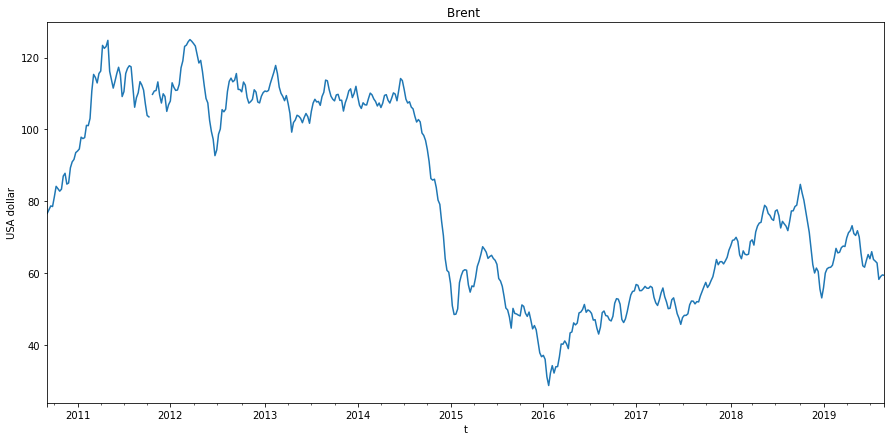

In [9]:
_ = brent_data_w['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [10]:
brent_data_w['2011-08-01' : '2011-11-30']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-08-07,111.728333,2011.0,8.000000,3.666667,3.000000,215.666667,31.0,2.666667,0.000000,0.000000,0.000000
2011-08-14,106.168333,2011.0,8.000000,10.666667,3.000000,222.666667,32.0,2.666667,0.000000,0.000000,0.000000
2011-08-21,108.843333,2011.0,8.000000,17.666667,3.000000,229.666667,33.0,2.666667,0.000000,0.000000,0.000000
2011-08-28,110.201667,2011.0,8.000000,24.666667,3.000000,236.666667,34.0,2.666667,0.000000,0.000000,0.000000
2011-09-04,113.291667,2011.0,8.500000,16.166667,3.000000,243.666667,35.0,2.666667,0.000000,0.166667,0.000000
2011-09-11,112.366667,2011.0,9.000000,7.666667,3.000000,250.666667,36.0,2.666667,0.166667,0.000000,0.166667
2011-09-18,110.946667,2011.0,9.000000,14.666667,3.000000,257.666667,37.0,2.666667,0.000000,0.000000,0.000000
2011-09-25,107.106667,2011.0,9.000000,21.666667,3.000000,264.666667,38.0,2.666667,0.000000,0.000000,0.000000
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.000000,0.000000,0.000000


In [11]:
brent_data_w.loc['2011-10-16'] = (brent_data_w.loc['2011-10-09'] + brent_data_w.loc['2011-10-23'])/2

In [12]:
brent_data_w['2011-10-01' : '2011-10-31']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,106.616667,2011.0,10.000000,13.500000,4.000000,286.500000,41.0,3.500000,0.0,0.083333,0.0
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


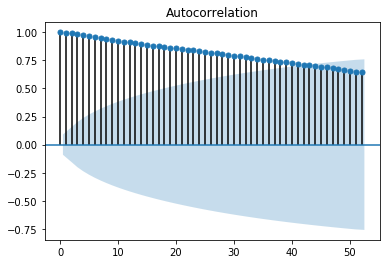

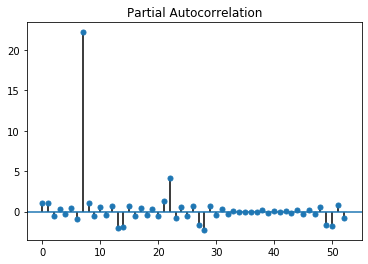

In [13]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=52)
plt.show()

Район пропуска в 2011 дает аномальные значение в PACF. Попробуем посмотреть на данные после этого периода

In [14]:
brent_data_w['2010-09-05' : '2011-10-16'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2010-09-05 to 2011-10-16
Freq: W-SUN
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Значение         59 non-null     float64
 1   year             59 non-null     float64
 2   month            59 non-null     float64
 3   dayofmonth       59 non-null     float64
 4   quarter          59 non-null     float64
 5   dayofyear        59 non-null     float64
 6   weekofyear       59 non-null     float64
 7   dayofweek        59 non-null     float64
 8   is_holiday       59 non-null     float64
 9   is_prev_holiday  59 non-null     float64
 10  is_next_holiday  59 non-null     float64
dtypes: float64(11)
memory usage: 5.5 KB


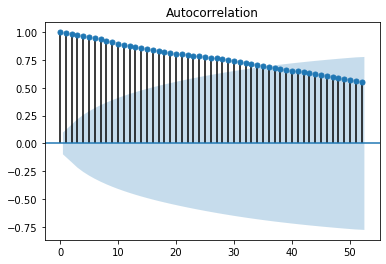

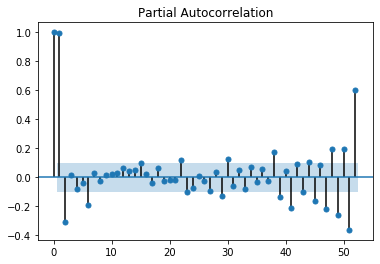

In [15]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values[70:], lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values[70:], lags=52)
plt.show()

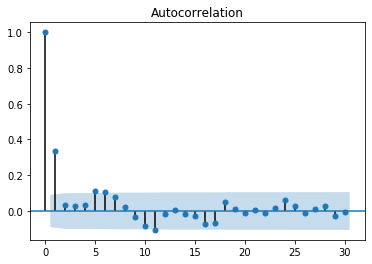

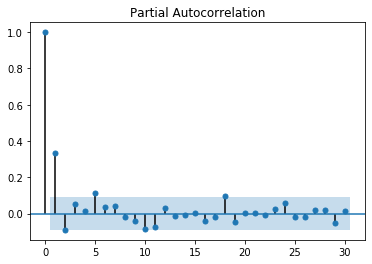

In [16]:
brent_w_dif = brent_data_w['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_w_dif[1:], lags=30)
plt.show()
sm.graphics.tsa.plot_pacf(brent_w_dif[1:], lags=30)
plt.show()

Сезона нет. ACF - падает со средней скоростью для дневныхи графиков, а для первых разностей ACF - быстро падает (не более 1-й корреляции) 
PACF - быстро пададает, а для первых разностей РACF - быстро падает (не более 1-ой корреляции)
q , p - берем р=2 (PACF) , q =1 (скорее всего не очень большой после производной)
ADF - 1 раз интегрируемый - d = 1 

In [23]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2 = 12

# возьмем данные после пропуска
modb = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[70:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:1612.7415950993318
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  388
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -800.371
Date:                Fri, 07 Aug 2020   AIC                           1612.742
Time:                        11:24:27   BIC                           1636.461
Sample:                             0   HQIC                          1622.149
                                - 388                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

In [24]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] 

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[70:-N2],
                                          order=param,seasonal_order=seasonal_pdq,trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:3372.723095423152
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:2874.514097183568
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:2486.331150188921
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:1673.1135600473815
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:1610.971544834846
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:1608.2102996154474
ARIMA(0, 2, 0)x[0, 0, 0, 0] - AIC:1750.1252340684766
ARIMA(0, 2, 1)x[0, 0, 0, 0] - AIC:1661.1338217931566
ARIMA(0, 2, 2)x[0, 0, 0, 0] - AIC:1614.9092871723892
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:1677.827767675589
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:1614.8360884297383
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:1611.7566109737825
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:1614.288067793072
ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:1611.0755726213486
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1607.2589051245766
ARIMA(1, 2, 0)x[0, 0, 0, 0] - AIC:1723.1422834444115
ARIMA(1, 2, 1)x[0, 0, 0, 0] - AIC:1636.8304137058874
ARIMA(1, 2, 2)x[0, 0, 0, 0] - AIC:1617.3934888859173
ARIMA(2, 0, 0)x[0, 0, 0, 0] - AIC:1613.8805441437912

Лучшие результаты на недельных данных параметры модели ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1607.2589051245766

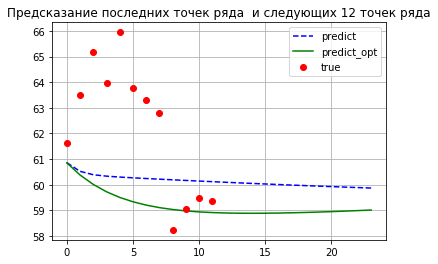

In [25]:
nforecast = N2+12

modb_opt = sm.tsa.statespace.SARIMAX(brent_data_w['Значение'].values[70:-N2],
                               order=[1,1,2],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 12 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(24) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинныe значения 
plt.plot(brent_data_w['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.show()

In [26]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,-0.0680,0.095,-0.719,0.472,-0.253,0.117
drift,0.0002,0.000,0.476,0.634,-0.001,0.001
ar.L1,0.7814,0.168,4.644,0.000,0.452,1.111
ma.L1,-0.3734,0.180,-2.077,0.038,-0.726,-0.021
ma.L2,-0.2329,0.104,-2.237,0.025,-0.437,-0.029
sigma2,3.7206,0.250,14.861,0.000,3.230,4.211


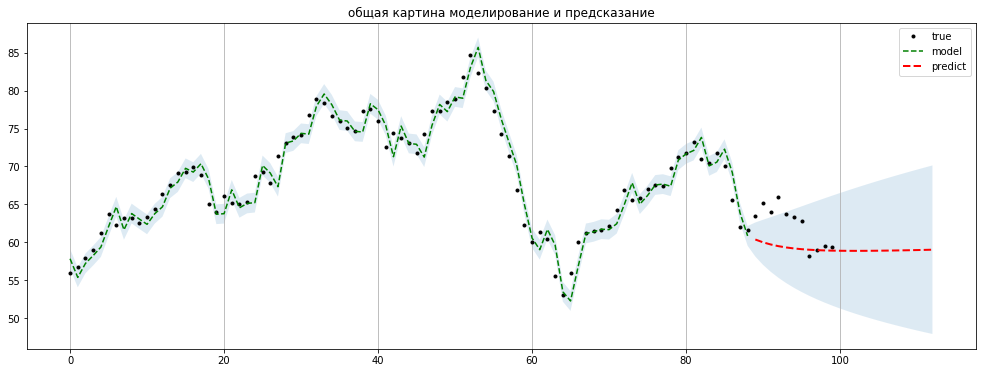

In [27]:
N3=300
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(17,6))
ax.xaxis.grid()
ax.plot(brent_data_w['Значение'].values[N3+70:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

### Оцените результат моделирования

In [28]:
adf_test = sm.tsa.stattools.adfuller(resultsb_opt.resid)
print(adf_test)

(-76.14311465261348, 0.0, 0, 387, {'1%': -3.447360865754795, '5%': -2.8690374364690445, '10%': -2.5707639493486636}, 1540.2090879377665)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков. 

### Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

На стационарных рядах  или тех, что можно привести к стационарным модель должна работать хорошо